In [ ]:
# Installing Pillow Libraries
# !pip install scikit-learn matplotlib Pillow

In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns
from KNN import KNNClassifier

In [2]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [3]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [4]:
dirpath = 'IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


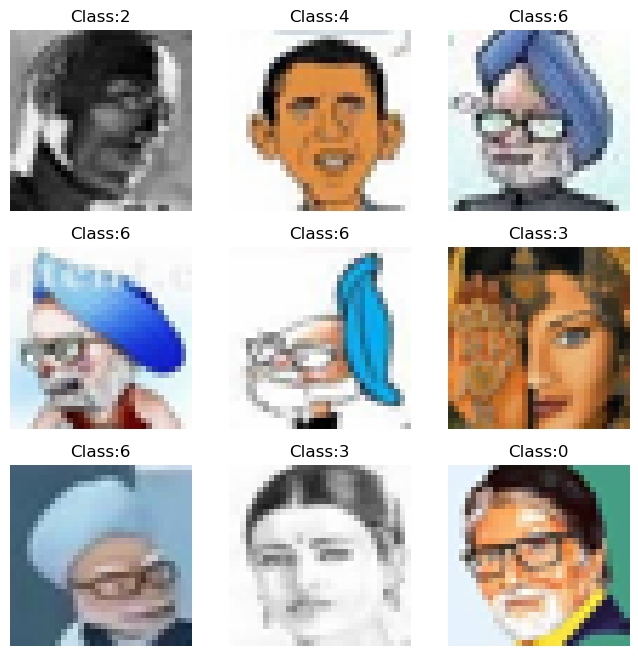

In [5]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],9)
display_images(X[ind,...],y[ind], row=3,col=3)

# Problem 1

Perform dimensionality reduction on the IIIT-CFW dataset, varying the number of principle components. We have given the script to pre-process the data and to get the necessary information from the image Script.

In [6]:
def PCA(X, K):
    N, D = X.shape

    # Center the data
    mean = np.mean(X, axis=0)
    centered_X = X - mean

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_X, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top K eigenvectors
    top_eigenvectors = eigenvectors[:, :K]

    # Calculate explained variance
    total_variance = np.sum(eigenvalues)
    explained_variance = np.cumsum(eigenvalues) / total_variance

    # Project data onto the reduced space
    reduced = np.dot(centered_X, top_eigenvectors)

    return reduced, top_eigenvectors, explained_variance

In [ ]:
K = 1000
components, top_eigenvectors, explained_variance = PCA(X.reshape(N, -1), K)

Plot the the relationship between the cumulative explained variance and
the number of principal components. The x-axis of the plot typically
represents the number of principal components, and the y-axis represents
the cumulative explained variance

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, K + 1), explained_variance[:K], linestyle='-')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

Accuracy :  0.25333333333333335
macro avg:
0.12505097292302372 0.1647126436781609 0.12791589938595382
weighted avg:
0.21283276299723666 0.25333333333333335 0.2106692839324418


Accuracy :  0.28
macro avg:
0.16963845252435855 0.18884627676573987 0.15873306410219162
weighted avg:
0.2671980056980057 0.28 0.24861856661856657


In [12]:
from tqdm import tqdm
X = X.reshape(N, -1)
N, D = X.shape

# Center the data
mean = np.mean(X, axis=0)
centered_X = X - mean

# Calculate the covariance matrix
covariance_matrix = np.cov(centered_X, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Observe the impact of dimensionality reduction on the dataset. Use a clas-
# sifier on the dataset pre and post-dimensionality reduction (if the number
# of features of the dataset is n, perform dimensionality reduction varying
# the principal components from 1 to n) and note the accuracies of the
# classifier. You are free to use external libraries for the classifier.
# do this using sklearn library

for K in tqdm(range(0, 3072), desc="Processing"):
    top_eigenvectors = eigenvectors[:, :K]
    reduced = np.dot(centered_X, top_eigenvectors)
    
    

Processing:  15%|█▍        | 457/3072 [00:40<03:49, 11.37it/s]


KeyboardInterrupt: 